In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Opean and Load image
path = r'images/coins.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Cretae gray image and blurred it!
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray,(5,5),1.3)

#Apply Canny edge detection (auto estimate threshold values)
median = np.median(blurred)
tuning = 0.33
minT = int((1.0-tuning)*median)
maxT = int((1.0+tuning)*median)
canny = cv2.Canny(blurred, minT, maxT)

I can count 9 coins in this image
1 inch = 2.54cm
dpi of image = 72 px/inch
therefore 1px = 2.54/72 = 0.03528 cm
Coin #1 has a diameter equal to 56.00 px or 1.97 cm.
Coin #2 has a diameter equal to 48.00 px or 1.68 cm.
Coin #3 has a diameter equal to 55.00 px or 1.94 cm.
Coin #4 has a diameter equal to 43.00 px or 1.52 cm.
Coin #5 has a diameter equal to 48.00 px or 1.68 cm.
Coin #6 has a diameter equal to 43.00 px or 1.53 cm.
Coin #7 has a diameter equal to 42.00 px or 1.47 cm.
Coin #8 has a diameter equal to 40.00 px or 1.42 cm.
Coin #9 has a diameter equal to 54.00 px or 1.89 cm.


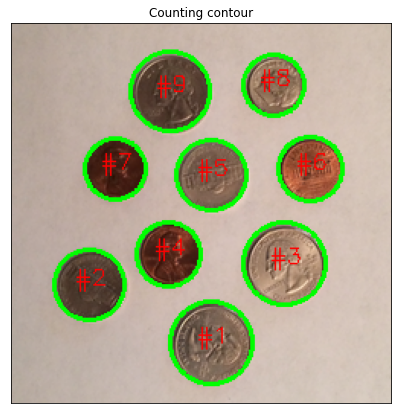

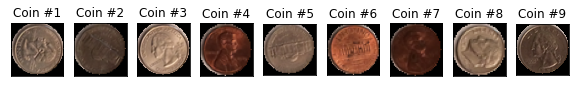

In [32]:
#Find contour on edged image
(cnts, _) = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
coins = image.copy()
print("I can count {} coins in this image".format(len(cnts)))
print('1 inch = 2.54cm')
print('dpi of image = 72 px/inch')
print('therefore 1px = 2.54/72 = 0.03528 cm')

#Plot individual coin
fig1, ax = plt.subplots(figsize=(7, 7))
fig2, bx = plt.subplots(1, 9, figsize=(10, 7))

#Looping over each countour
for (i, c) in enumerate(cnts):
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(coins, (int(cX), int(cY)),  int(radius), (0,255,0), 2)
    cv2.putText(coins, "#{}".format(i+1), (int(cX)-10, int(cY)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)
    #Cut the coin
    (x, y, w, h) = cv2.boundingRect(c)
    coin = image[y:y+h, x:x+w]
    mask = np.zeros(image.shape[:2], dtype='uint8')
    cv2.circle(mask, (int(cX),int(cY)), int(radius), 255, -1)
    mask = mask[y:y+h, x:x+w]
    mcoin = cv2.bitwise_and(coin, coin, mask=mask)
    print("Coin #{} has a diameter equal to {:.2f} px or {:.2f} cm.".format(i+1, round(radius*2), radius*2*0.03528))
    bx[i].set(title='Coin #{}'.format(i+1))
    bx[i].axes.xaxis.set_visible(False)
    bx[i].axes.yaxis.set_visible(False)
    bx[i].imshow(mcoin)

ax.set(title='Counting contour')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.imshow(coins)